In [13]:
#Connect Google Drive to Colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Drive REST API and authenticate

from google.colab import auth
auth.authenticate_user()

In [0]:
#Unzip data

#!unzip -q cars-wagonr-swift.zip

#Or unzip data in dataset
#!unzip -q cars-wagonr-swift.zip -d dataset/

#Or
#tar -cvf dataset.tar ~/Dataset

In [0]:
#Change dir
import os
os.chdir('/content/drive/My Drive/Colab Notebooks')
# Defining paths to tranning and test images.
train_folder = "data/train"
test_folder  = "data/test"
valid_folder  = "data/validation"

In [0]:
# Import necessary libraries and packages
import os
import cv2 
import keras
import random
import timeit
import numpy as np
import pandas as pd 
import skimage as sk
import seaborn as sn
import tensorflow as tf
from skimage import util
from scipy import ndarray
from random import randint
import keras.layers as layers
import keras.models as models
from skimage import transform
from tensorflow.keras import *
import matplotlib.pyplot as plt
from keras.layers import Dropout
from sklearn.utils import shuffle
from keras.activations import elu
from keras.regularizers import l2
from keras.regularizers import l1
from keras.optimizers import Adam
from keras.models import load_model
from keras.optimizers import RMSprop
import tensorflow.keras.layers as Layers
import tensorflow.keras.models as Models
from skimage.exposure import adjust_gamma
import tensorflow.keras.metrics as Metrics
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model
import tensorflow.keras.optimizers as Optimizer
from sklearn.model_selection import cross_val_score
from keras.layers.normalization import BatchNormalization

In [0]:
#Pre-process data
def pre_process(path, image_size=150):
    """This function loads, resizes, standardizes and shuffles all images."""
    data = []
    labels = []
    for category in os.listdir(path):
        if(category == "swift"):
            label = 0
        elif(category == "wagonr"):
            label = 1
        

        training_subfolder_path = path + "/" + category

        for file in os.listdir(training_subfolder_path):
            image_path = training_subfolder_path + "/" + file
            image = cv2.imread(image_path)

            #Resize all images so they all have the same size
            image = cv2.resize(image,(image_size, image_size))
            image = np.array(image)

            #Standardize data by dividing by 255
            image = image.astype('float32')/255.0
            data.append(image)
            labels.append(label)

    #Shuffle data
    data, labels = shuffle(data, labels)
    data = np.array(data)
    labels = np.array(labels)
    return data, labels

In [0]:
# Loading data
train_data, labels = pre_process(train_folder, image_size=150)
valid_data, valid_labels=pre_process(valid_folder, image_size=150)

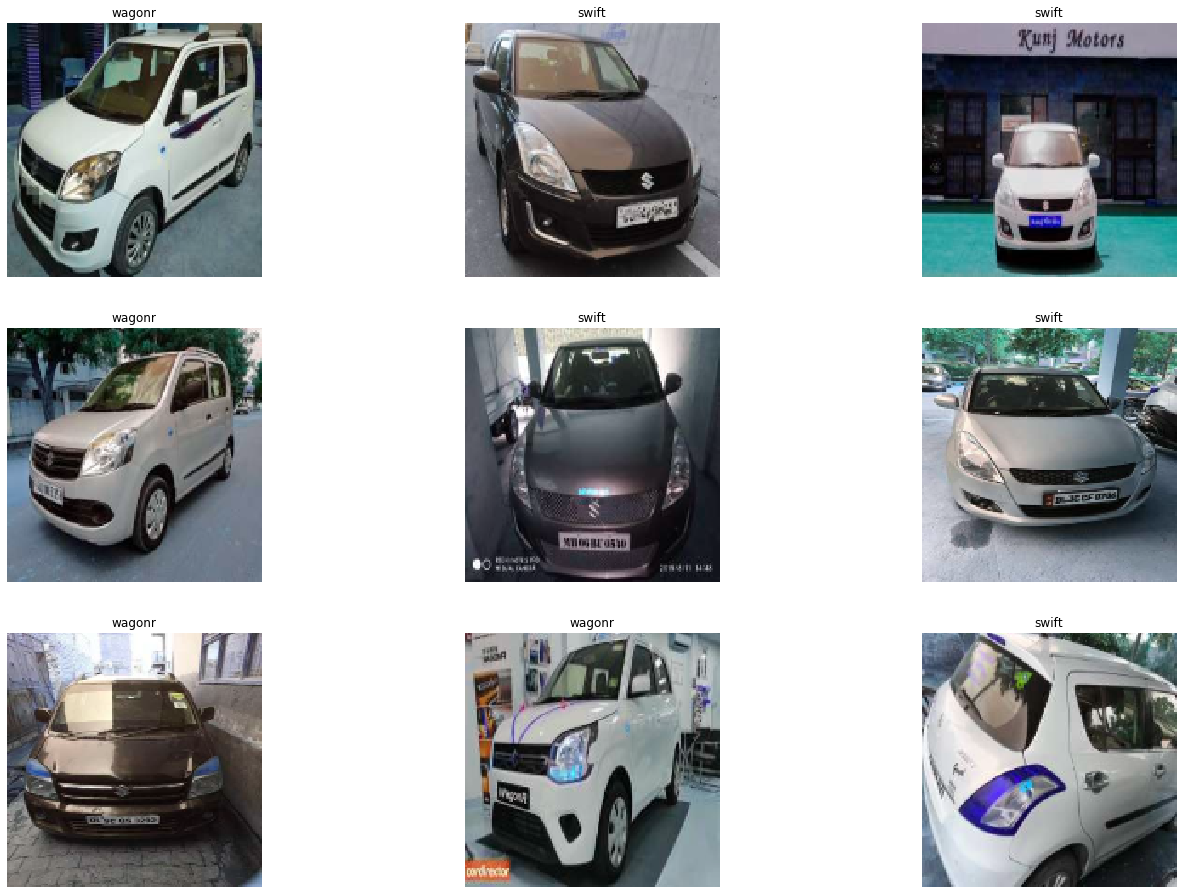

In [21]:
def get_classlabel(class_code):
  
    labels = {0:'swift', 1:'wagonr'}  
    return labels[class_code]
# Plotting images with class labels.
f,ax = plt.subplots(3,3)
f.subplots_adjust(0,0,3,3)
for i in range(0,3,1):
    for j in range(0,3,1):
        rnd_number = randint(0,len(train_data))
        ax[i,j].imshow(train_data[rnd_number])
        ax[i,j].set_title(get_classlabel(labels[rnd_number]))
        ax[i,j].axis('off')

In [22]:
# Data Augmentation Section

#Defining augmentation operations.
def horizontal_flip(image):    
    return image[:, ::-1]

def up_side_down(image):
    return np.rot90(image, 2)

# Defining augmentation methods.    
methods={'h_flip':horizontal_flip,'u_s_d':up_side_down}
# Defining data and label lists to append images into.
data = []
labels = []
# Setting the path of data.
path = "data/train"
for category in os.listdir(path):
    if(category == "swift"):
        label = 0
    elif(category == "wagonr"):
        label = 1

    training_subfolder_path = path + "/" + category        
    for file in os.listdir(training_subfolder_path):
        image_path = training_subfolder_path + "/" + file
        image = cv2.imread(image_path)

        #Resize all images so they all have the same size
        image = cv2.resize(image,(150,150))
        image = np.array(image)

        #Standardize data by dividing by 255
        image = image.astype('float32')/255.0
        data.append(image)
        labels.append(label)

        # Randomly choosing an augmentation operation.
        key = random.choice(list(methods))
        image=methods[key](image)
        data.append(image)
        labels.append(label)


print("Training data", len(data))

Training data 4800


In [0]:
#Shuffle data
data, labels = shuffle(data, labels)
data = np.array(data)
labels = np.array(labels)
train_data = data

In [0]:
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'swift': #Folder contain Glacier Images get the '2' class label.
            label = 0
        elif labels == 'wagonr':
            label = 1

        
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

In [0]:
valid_images,valid_labels = get_images('data/validation/')
valid_images = np.array(valid_images)
valid_labels = np.array(valid_labels)
test_images,test_labels = get_images('data/test/')
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [0]:
#First simple Sequential model
model = keras.models.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation="relu"))                 
model.add(keras.layers.Dense(1, activation="sigmoid"))                  

In [18]:
#Compile model 
model.compile(loss="binary_crossentropy", #Binary crossentropy
              optimizer="sgd",
              metrics=["accuracy"])

In [19]:
#Fit and Run model
history = model.fit(train_data,labels,epochs=4,validation_data=(valid_data,valid_labels),batch_size=32)




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 4800 samples, validate on 800 samples
Epoch 1/4





4800/4800 [==============================] - 3s 676us/step - loss: 0.7361 - acc: 0.5250 - val_loss: 0.6934 - val_acc: 0.5275
Epoch 2/4
4800/4800 [==============================] - 2s 520us/step - loss: 0.6881 - acc: 0.5369 - val_loss: 0.6984 - val_acc: 0.5075
Epoch 3/4
4800/4800 [==============================] - 3s 526us/step - loss: 0.6834 - acc: 0.5598 - val_loss: 0.7094 - val_acc: 0.5138
Epoch 4/4
4800/4800 [==============================] - 2s 520us/step - loss: 3.6380 - acc: 0.5092 - val_loss: 8.0575 - val_acc: 0.5000


In [0]:
#Evaluate Test Dataset
Evaluate = model.evaluate(test_images,test_labels, verbose=0)
print("Loss on test set: ", Evaluate[0])
print("Accuracy on test set: ", Evaluate[1])

Loss on test set:  7.027001514434814
Accuracy on test set:  0.55125


In [0]:
#Now Change batch_size and Run model
history = model.fit(train_data,labels,epochs=5,validation_data=(valid_data,valid_labels),batch_size=64) #batch_size=64

Train on 4800 samples, validate on 800 samples
Epoch 1/5
4800/4800 [==============================] - 2s 333us/step - loss: 0.6698 - acc: 0.5898 - val_loss: 0.7086 - val_acc: 0.5337
Epoch 2/5
4800/4800 [==============================] - 1s 307us/step - loss: 0.6820 - acc: 0.5725 - val_loss: 0.8512 - val_acc: 0.4988
Epoch 3/5
4800/4800 [==============================] - 1s 307us/step - loss: 6.7863 - acc: 0.4988 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 4/5
4800/4800 [==============================] - 1s 311us/step - loss: 7.9708 - acc: 0.5000 - val_loss: 7.9700 - val_acc: 0.5000
Epoch 5/5
4800/4800 [==============================] - 1s 309us/step - loss: 7.9701 - acc: 0.5000 - val_loss: 7.9683 - val_acc: 0.5000


In [0]:
#Evaluate Test Dataset
Evaluate = model.evaluate(test_images,test_labels, verbose=0)
print("Loss on test set: ", Evaluate[0])
print("Accuracy on test set: ", Evaluate[1])

Loss on test set:  7.9711928558349605
Accuracy on test set:  0.5


In [0]:
#Second simple Sequential model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(200, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))                  
model.add(tf.keras.layers.Dense(2, activation="sigmoid"))                  

In [0]:
#Compile model and Fit to Run
model.compile(loss="sparse_categorical_crossentropy", ##Sparse categorical crossentropy
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(train_data,labels,epochs=4,validation_data=(valid_data,valid_labels),batch_size=32)

Train on 4800 samples, validate on 800 samples
Epoch 1/4
4800/4800 [==============================] - 11s 2ms/sample - loss: 0.6970 - acc: 0.5000 - val_loss: 0.6959 - val_acc: 0.5000
Epoch 2/4
4800/4800 [==============================] - 11s 2ms/sample - loss: 0.6913 - acc: 0.5000 - val_loss: 0.6957 - val_acc: 0.5000
Epoch 3/4
4800/4800 [==============================] - 11s 2ms/sample - loss: 0.6937 - acc: 0.5052 - val_loss: 0.6932 - val_acc: 0.5013
Epoch 4/4
4800/4800 [==============================] - 11s 2ms/sample - loss: 0.6931 - acc: 0.5298 - val_loss: 0.6932 - val_acc: 0.5113


Text(0.5, 1.0, 'Accuracy')

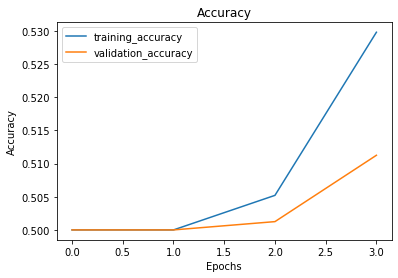

In [0]:
# Plot histotry Accuracy
plt.plot(history.history['acc'],label='training_accuracy')
plt.plot(history.history['val_acc'],label='validation_accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy")

In [0]:
#Evaluate Test Dataset
Evaluate = model.evaluate(test_images,test_labels, verbose=0)
print("Loss on test set: ", Evaluate[0])
print("Accuracy on test set: ", Evaluate[1])

Loss on test set:  6.679576950073242
Accuracy on test set:  0.52875


In [0]:
#3th simple Sequential model,Add Dropout
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(100, activation="relu"))                  
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))                  

In [0]:
#Compile model and Fit to Run
model.compile(loss="binary_crossentropy", #Binary crossentropy :)
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(train_data,labels,epochs=4,validation_data=(valid_data,valid_labels),batch_size=64) #batch_size=64 -> model run faster

Train on 4800 samples, validate on 800 samples
Epoch 1/4
4800/4800 [==============================] - 13s 3ms/sample - loss: 0.7004 - acc: 0.5091 - val_loss: 0.6936 - val_acc: 0.5110
Epoch 2/4
4800/4800 [==============================] - 12s 3ms/sample - loss: 0.6923 - acc: 0.5177 - val_loss: 0.6956 - val_acc: 0.4990
Epoch 3/4
4800/4800 [==============================] - 12s 3ms/sample - loss: 0.6892 - acc: 0.5325 - val_loss: 0.6940 - val_acc: 0.5104
Epoch 4/4
4800/4800 [==============================] - 12s 3ms/sample - loss: 0.6885 - acc: 0.5367 - val_loss: 0.7013 - val_acc: 0.4963


In [0]:
history = model.fit(train_data,labels,epochs=4,validation_data=(valid_data,valid_labels),batch_size=16) #batch_size=16 -> model run slower

Train on 4800 samples, validate on 800 samples
Epoch 1/4
4800/4800 [==============================] - 35s 7ms/sample - loss: 0.6941 - acc: 0.5206 - val_loss: 0.6949 - val_acc: 0.5090
Epoch 2/4
4800/4800 [==============================] - 35s 7ms/sample - loss: 0.6909 - acc: 0.5319 - val_loss: 0.6972 - val_acc: 0.5079
Epoch 3/4
4800/4800 [==============================] - 35s 7ms/sample - loss: 0.6860 - acc: 0.5465 - val_loss: 0.7014 - val_acc: 0.5144
Epoch 4/4
4800/4800 [==============================] - 35s 7ms/sample - loss: 0.6845 - acc: 0.5478 - val_loss: 0.6987 - val_acc: 0.5071


In [0]:
#4th simple Sequential model,2 Dropout
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(50, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(1, activation="sigmoid")) 


In [0]:
#Set parameters
epochs = 1
lrate = 0.0001
decay = lrate/epochs
sgd = tf.keras.optimizers.SGD(lr=lrate, momentum=0.01, decay=decay, nesterov=False) #SGD have not good result

# Compiling the  model
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [0]:
#Fit and Run
history = model.fit(train_data,labels,epochs=3,validation_data=(valid_data,valid_labels),batch_size=32)

Train on 4800 samples, validate on 800 samples
Epoch 1/3
4800/4800 [==============================] - 7s 1ms/sample - loss: 0.6966 - acc: 0.5096 - val_loss: 0.6940 - val_acc: 0.4938
Epoch 2/3
4800/4800 [==============================] - 7s 1ms/sample - loss: 0.6931 - acc: 0.5310 - val_loss: 0.6922 - val_acc: 0.5150
Epoch 3/3
4800/4800 [==============================] - 7s 1ms/sample - loss: 0.6915 - acc: 0.5231 - val_loss: 0.6923 - val_acc: 0.5038


In [0]:
#5th simple Sequential model,Change Droupout rate
model = keras.models.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dropout(0.2))                 
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dropout(rate=0.3))
model.add(keras.layers.Dense(1, activation="sigmoid"))


In [0]:
#Compile model and Fit to Run
model.compile(loss="binary_crossentropy", #Binary crossentropy :)
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(train_data,labels,epochs=5,validation_data=(valid_data,valid_labels),batch_size=32)

Train on 4800 samples, validate on 800 samples
Epoch 1/5
4800/4800 [==============================] - 15s 3ms/step - loss: 0.6983 - acc: 0.4825 - val_loss: 0.6930 - val_acc: 0.4963
Epoch 2/5
4800/4800 [==============================] - 13s 3ms/step - loss: 0.6935 - acc: 0.5096 - val_loss: 0.6930 - val_acc: 0.5088
Epoch 3/5
4800/4800 [==============================] - 12s 3ms/step - loss: 0.6938 - acc: 0.5048 - val_loss: 0.6929 - val_acc: 0.5312
Epoch 4/5
4800/4800 [==============================] - 12s 3ms/step - loss: 0.6928 - acc: 0.5256 - val_loss: 0.6928 - val_acc: 0.5250
Epoch 5/5
4800/4800 [==============================] - 12s 3ms/step - loss: 0.6913 - acc: 0.5219 - val_loss: 0.6939 - val_acc: 0.5125


Text(0.5, 1.0, 'Accuracy')

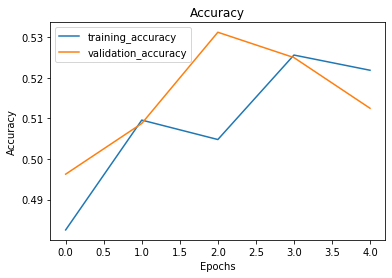

In [0]:
# Plot histotry Accuracy
plt.plot(history.history['acc'],label='training_accuracy')
plt.plot(history.history['val_acc'],label='validation_accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy")

In [0]:
#Evaluate Test Dataset
Evaluate = model.evaluate(test_images,test_labels, verbose=0)
print("Loss on test set: ", Evaluate[0])
print("Accuracy on test set: ", Evaluate[1])

Loss on test set:  6.679576950073242
Accuracy on test set:  0.52875


In [0]:
#6th simple Sequential model,Dense
model = Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(200,activation="relu"))
model.add(layers.Dense(50,activation="relu"))
model.add(layers.Dense(30,activation="relu"))
model.add(layers.Dense(10,activation="relu"))
model.add(layers.Dense(2,activation="sigmoid"))


In [0]:
#Compile model and Fit to Run

model.compile(loss="binary_crossentropy", 
              optimizer=optimizers.RMSprop(lr = 1e-3),  #Optimizers RMSprop :(
              metrics=["acc"])

history = model.fit(train_data,labels,
                    epochs=2,
                    validation_data=(valid_data,valid_labels),
                    batch_size=32)

Train on 4800 samples, validate on 800 samples
Epoch 1/2
4800/4800 [==============================] - 25s 5ms/sample - loss: 3.0628 - acc: 0.5129 - val_loss: 3.2570 - val_acc: 0.5000
Epoch 2/2
4800/4800 [==============================] - 22s 5ms/sample - loss: 0.8771 - acc: 0.5086 - val_loss: 0.7014 - val_acc: 0.5006


In [0]:
#7th simple Sequential model,Flatten-Dense
model.add(layers.Flatten())
model.add(layers.Dense(100, activation="relu"))
model.add(layers.Dense(70, activation="relu"))
model.add(layers.Dense(50, activation="relu"))
model.add(layers.Dropout(rate=0.3))
model.add(layers.Flatten())
model.add(layers.Dense(30, activation="relu"))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(1, activation="softmax"))

In [0]:
#Compile model and Fit to Run
model.compile(loss="binary_crossentropy", 
              optimizer="sgd", 
              metrics=["accuracy"])

history = model.fit(train_data,
                    labels,epochs=1,
                    validation_split=0.3,
                    batch_size=16)

Train on 3360 samples, validate on 1440 samples
3360/3360 [==============================] - 26s 8ms/sample - loss: 34.6027 - acc: 0.5042 - val_loss: 34.7885 - val_acc: 0.4903


In [0]:
#Now Build a other Model
model = Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(200, activation="relu",kernel_regularizer=l1(0.02)))
model.add(layers.Dense(100, activation="relu"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(50, activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation="softmax"))

In [0]:
#Compile model and Fit to Run
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="Adam", 
              metrics=["acc"])

history = model.fit(train_data,labels,
                    epochs=2,
                    validation_split=0.2,
                    batch_size=16)

Train on 3840 samples, validate on 960 samples
Epoch 1/2
3840/3840 [==============================] - 11s 3ms/sample - loss: 71.4014 - acc: 0.4911 - val_loss: 35.2808 - val_acc: 0.5177
Epoch 2/2
3840/3840 [==============================] - 9s 2ms/sample - loss: 35.4225 - acc: 0.5005 - val_loss: 34.9780 - val_acc: 0.4844


In [0]:
#Evaluate Test Dataset
Evaluate = model.evaluate(test_images,test_labels, verbose=0)
print("Loss on test set: ", Evaluate[0])
print("Accuracy on test set: ", Evaluate[1])

Loss on test set:  40.42926559448242
Accuracy on test set:  0.50375


In [0]:
#Now Build a Beter Model,Add Convolution
model = tf.keras.models.Sequential([
    # Convolution
    tf.keras.layers.Conv2D(16, (2,2), activation='relu', input_shape=(150, 150, 3)),
    # Flatten 
    tf.keras.layers.Flatten(),
    # Dense
    tf.keras.layers.Dense(128, activation='relu'),
    # Flatten 
    tf.keras.layers.Flatten(),
    # Fully connected
    tf.keras.layers.Dense(128, activation='relu'),
    #  output  with the softmax activation
    tf.keras.layers.Dense(2, activation='softmax')
])

In [0]:
model.compile(loss = 'sparse_categorical_crossentropy',
                  optimizer="sgd",
                  metrics = ['acc']
                  )
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 149, 149, 16)      208       
_________________________________________________________________
flatten_42 (Flatten)         (None, 355216)            0         
_________________________________________________________________
dense_72 (Dense)             (None, 128)               45467776  
_________________________________________________________________
flatten_43 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_74 (Dense)             (None, 2)                 258       
Total params: 45,484,754
Trainable params: 45,484,754
Non-trainable params: 0
_________________________________________

In [0]:
#Model fit to run
history = model.fit(train_data,
                    labels,
                    epochs=5,
                    validation_data=(valid_data,valid_labels),
                    batch_size=32)

Train on 4800 samples, validate on 800 samples
Epoch 1/5
4800/4800 [==============================] - 13s 3ms/sample - loss: 0.6685 - acc: 0.5898 - val_loss: 0.7087 - val_acc: 0.5088
Epoch 2/5
4800/4800 [==============================] - 12s 3ms/sample - loss: 0.6518 - acc: 0.6158 - val_loss: 0.7182 - val_acc: 0.5150
Epoch 3/5
4800/4800 [==============================] - 13s 3ms/sample - loss: 0.6304 - acc: 0.6400 - val_loss: 0.7386 - val_acc: 0.5263
Epoch 4/5
4800/4800 [==============================] - 12s 3ms/sample - loss: 0.6152 - acc: 0.6598 - val_loss: 0.7581 - val_acc: 0.5225
Epoch 5/5
4800/4800 [==============================] - 12s 3ms/sample - loss: 0.5896 - acc: 0.6831 - val_loss: 0.7835 - val_acc: 0.5263


In [0]:
#Model Fit to Run and get Beter Result
history = model.fit(train_data,
                    labels,
                    epochs=5,
                    validation_split=0.3,
                    batch_size=32)

Train on 3360 samples, validate on 1440 samples
Epoch 1/5
3360/3360 [==============================] - 10s 3ms/sample - loss: 0.7027 - acc: 0.5077 - val_loss: 0.6849 - val_acc: 0.5569
Epoch 2/5
3360/3360 [==============================] - 9s 3ms/sample - loss: 0.6835 - acc: 0.5530 - val_loss: 0.6856 - val_acc: 0.5562
Epoch 3/5
3360/3360 [==============================] - 9s 3ms/sample - loss: 0.6764 - acc: 0.5845 - val_loss: 0.6720 - val_acc: 0.5868
Epoch 4/5
3360/3360 [==============================] - 9s 3ms/sample - loss: 0.6636 - acc: 0.5929 - val_loss: 0.6669 - val_acc: 0.5826
Epoch 5/5
3360/3360 [==============================] - 9s 3ms/sample - loss: 0.6490 - acc: 0.6232 - val_loss: 0.6758 - val_acc: 0.5771


In [0]:
# Define CNN model

def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150, 150, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

In [0]:
#Model fit to run
history = model.fit(train_data,labels,
                    epochs=2,
                    validation_split=0.3,
                    batch_size=64)

Train on 3360 samples, validate on 1440 samples
Epoch 1/2
3360/3360 [==============================] - 7s 2ms/sample - loss: 0.5592 - acc: 0.7164 - val_loss: 0.5847 - val_acc: 0.6583
Epoch 2/2
3360/3360 [==============================] - 7s 2ms/sample - loss: 0.5379 - acc: 0.7271 - val_loss: 0.5486 - val_acc: 0.7083


In [0]:
# grid search values
from keras.regularizers import l2
from matplotlib import pyplot
f
f.subplots_adjust(0,0,2,2)
values = [0,1e-1]  #, 1e-2, 1e-3
i=-1
for parama in values:
    i=i+1
    j=0
    for paramb in values:
        all_train, all_test = list(), list()
        model = tf.keras.models.Sequential()
        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(300, activation="relu",kernel_regularizer=l2(parama)))
        model.add(tf.keras.layers.Dense(100, activation="relu",kernel_regularizer=l2(paramb)))
        model.add(tf.keras.layers.Dense(2, activation="softmax"))
        model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
        
        model.fit(train_data,labels,epochs=1)
        _,train_acc = model.evaluate(train_data,labels, verbose=0)
        _,test_acc = model.evaluate(test_images, test_labels, verbose=0)
        all_train.append(train_acc)
        all_test.append(test_acc)

        j=j+1

Train on 4800 samples
4800/4800 [==============================] - 4s 856us/sample - loss: 0.7320 - acc: 0.5242
Train on 4800 samples
4800/4800 [==============================] - 4s 831us/sample - loss: 12.0522 - acc: 0.5104
Train on 4800 samples
4800/4800 [==============================] - 8s 2ms/sample - loss: 45.7534 - acc: 0.5125
Train on 4800 samples
4800/4800 [==============================] - 7s 2ms/sample - loss: 57.0376 - acc: 0.5252


In [0]:
# Build New model,Add regularizer l1,l2

model = Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(300, activation="relu",kernel_regularizer=l2(.01)))
model.add(layers.Dense(100, activation="relu"))
model.add(layers.Dense(300, activation="relu",kernel_regularizer=l1(.02)))
model.add(layers.Dense(100, activation="relu"))
model.add(layers.Dense(300, activation="relu",kernel_regularizer=l2(.01)))
model.add(layers.Dense(100, activation="relu"))
model.add(layers.Dense(2, activation="softmax"))

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [0]:
early_stopping_cb=tf.keras.callbacks.EarlyStopping(monitor='acc',
                                                   patience=2, verbose=2,
                                                   mode='auto',
                                                   restore_best_weights=True)

history = model.fit(train_data,
                    labels,
                    epochs=10,
                    validation_data=(valid_data,valid_labels)
                    callbacks=[ early_stopping_cb])

Train on 4800 samples
Epoch 1/10
4800/4800 [==============================] - 27s 6ms/sample - loss: 6.4902 - acc: 0.5046
Epoch 2/10
4800/4800 [==============================] - 26s 5ms/sample - loss: 6.1520 - acc: 0.5177
Epoch 3/10
4800/4800 [==============================] - 26s 5ms/sample - loss: 5.8335 - acc: 0.5325
Epoch 4/10
4800/4800 [==============================] - 26s 5ms/sample - loss: 5.5321 - acc: 0.5652
Epoch 5/10
4800/4800 [==============================] - 26s 5ms/sample - loss: 5.2475 - acc: 0.5663
Epoch 6/10
4800/4800 [==============================] - 26s 5ms/sample - loss: 4.9781 - acc: 0.5721
Epoch 7/10
4800/4800 [==============================] - 26s 5ms/sample - loss: 4.7243 - acc: 0.5771
Epoch 8/10
4800/4800 [==============================] - 26s 6ms/sample - loss: 4.4863 - acc: 0.5817
Epoch 9/10
4800/4800 [==============================] - 26s 5ms/sample - loss: 4.2611 - acc: 0.5881
Epoch 10/10
4800/4800 [==============================] - 26s 5ms/sample - loss

In [0]:
from keras.regularizers import l2
from keras.regularizers import l1
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu",kernel_regularizer=l2(.01)))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu",kernel_regularizer=l1(.01)))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu",kernel_regularizer=l2(.01)))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(2, activation="softmax"))

In [0]:
#Compile model and Fit to Run
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="sgd", 
              metrics=["accuracy"])

In [0]:
#Set Early Stopping Parameters and fit model to run
early_stopping_cb=callbacks.EarlyStopping(monitor='acc',
                                          patience=2,
                                          verbose=2,
                                          mode='auto',
                                          restore_best_weights=True)
history = model.fit(train_data,
                    labels,
                    epochs=10,
                    validation_data=(valid_data,valid_labels),
                    callbacks =[early_stopping_cb] )

Train on 4800 samples, validate on 800 samples
Epoch 1/10
4800/4800 [==============================] - 5s 1ms/sample - loss: 8.4136 - acc: 0.5119 - val_loss: 7.7598 - val_acc: 0.5050
Epoch 2/10
4800/4800 [==============================] - 4s 814us/sample - loss: 7.1562 - acc: 0.5392 - val_loss: 6.5717 - val_acc: 0.5238
Epoch 3/10
4800/4800 [==============================] - 4s 813us/sample - loss: 6.0339 - acc: 0.5619 - val_loss: 5.5216 - val_acc: 0.5225
Epoch 4/10
4800/4800 [==============================] - 4s 856us/sample - loss: 5.0464 - acc: 0.5731 - val_loss: 4.6079 - val_acc: 0.4850
Epoch 5/10
4800/4800 [==============================] - 4s 844us/sample - loss: 4.1924 - acc: 0.5842 - val_loss: 3.8248 - val_acc: 0.5300
Epoch 6/10
4800/4800 [==============================] - 4s 853us/sample - loss: 3.4741 - acc: 0.5998 - val_loss: 3.1808 - val_acc: 0.5050
Epoch 7/10
4800/4800 [==============================] - 4s 819us/sample - loss: 2.8900 - acc: 0.6008 - val_loss: 2.6812 - val_a

In [0]:
#Functional Model

In  = keras.layers.Input(shape=[150,150,3])
F1  = keras.layers.Flatten()(In)
D1  = keras.layers.Dense(100, activation="relu")(F1)
D2  = keras.layers.Dense(50, activation="relu")(D1)
Dr1 = keras.layers.Dropout(0.3)(D2)
F2  = keras.layers.Flatten()(In)
D3  = keras.layers.Dense(80, activation="relu")(F2)
D4  = keras.layers.Dense(40, activation="relu")(D3)
Dr2 = keras.layers.Dropout(0.5)(D4)
C1  = keras.layers.concatenate([Dr1, D2])
Out = keras.layers.Dense(2,activation="softmax" ,name="Out")(C1)
model = keras.models.Model(inputs=In, outputs=Out)

In [0]:
#Compile model and Fit to Run
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="sgd", 
              metrics=["accuracy"])
model.summary()    

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
flatten_27 (Flatten)            (None, 67500)        0           input_18[0][0]                   
__________________________________________________________________________________________________
dense_59 (Dense)                (None, 100)          6750100     flatten_27[0][0]                 
__________________________________________________________________________________________________
dense_60 (Dense)                (None, 50)           5050        dense_59[0][0]                   
___________________________________________________________________________________________

In [0]:
#Set Early Stopping Parameters and fit model to run
early_stopping_cb=keras.callbacks.EarlyStopping(monitor='acc',
                                                patience=3,
                                                verbose=2,
                                                mode='auto', 
                                                restore_best_weights=True)

history = model.fit(train_data,
                    labels,
                    epochs=10,
                    validation_data=(valid_data,valid_labels),
                    callbacks=[ early_stopping_cb])

Train on 4800 samples, validate on 800 samples
Epoch 1/10
4800/4800 [==============================] - 3s 712us/step - loss: 0.6770 - acc: 0.5687 - val_loss: 0.7024 - val_acc: 0.5437
Epoch 2/10
4800/4800 [==============================] - 3s 722us/step - loss: 0.6674 - acc: 0.5923 - val_loss: 0.7266 - val_acc: 0.5162
Epoch 3/10
4800/4800 [==============================] - 3s 716us/step - loss: 0.6670 - acc: 0.5944 - val_loss: 0.7054 - val_acc: 0.5413
Epoch 4/10
4800/4800 [==============================] - 3s 728us/step - loss: 0.6655 - acc: 0.5890 - val_loss: 0.7054 - val_acc: 0.4975
Epoch 5/10
4800/4800 [==============================] - 3s 710us/step - loss: 0.6587 - acc: 0.5998 - val_loss: 0.7133 - val_acc: 0.5463
Epoch 6/10
4800/4800 [==============================] - 3s 722us/step - loss: 0.6553 - acc: 0.6092 - val_loss: 0.7221 - val_acc: 0.5400
Epoch 7/10
4800/4800 [==============================] - 3s 712us/step - loss: 0.6445 - acc: 0.6192 - val_loss: 0.7188 - val_acc: 0.4963
E

Text(0.5, 1.0, 'Accuracy')

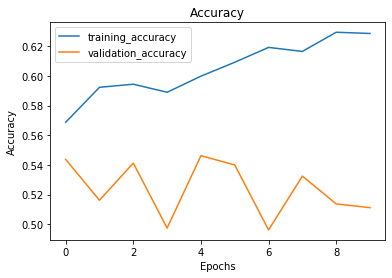

In [0]:
# Plot histotry Accuracy
plt.plot(history.history['acc'],label='training_accuracy')
plt.plot(history.history['val_acc'],label='validation_accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy")

In [0]:
#Evaluate Test Dataset
Evaluate = model.evaluate(test_images,test_labels, verbose=0)
print("Loss on test set: ", Evaluate[0])
print("Accuracy on test set: ", Evaluate[1])

Loss on test set:  2.651363468170166
Accuracy on test set:  0.58875


In [0]:
#New functional model
In = keras.layers.Input(shape=[150,150,3])
F1  = keras.layers.Flatten()(In)
D1  = keras.layers.Dense(200, activation="relu")(F1)
B1  = keras.layers.BatchNormalization()(D1)
Dr1 = keras.layers.Dropout(0.3)(B1)
D2  = keras.layers.Dense(100, activation="relu")(Dr1)
B2  = keras.layers.BatchNormalization()(D2)
Dr2 = keras.layers.Dropout(0.5)(B2)
C1  = keras.layers.concatenate([Dr1, D2])
Out = keras.layers.Dense(2,activation="softmax" ,name="Out")(C1)
model = keras.models.Model(inputs=In, outputs=Out)

In [0]:
#Compile model and Fit to Run
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="sgd", 
              metrics=["acc"])
model.summary()   

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
flatten_36 (Flatten)            (None, 67500)        0           input_23[0][0]                   
__________________________________________________________________________________________________
dense_70 (Dense)                (None, 200)          13500200    flatten_36[0][0]                 
__________________________________________________________________________________________________
batch_normalization_22 (BatchNo (None, 200)          800         dense_70[0][0]                   
___________________________________________________________________________________________

In [0]:
#Set Early Stopping Parameters and fit model to run
early_stopping_cb=keras.callbacks.EarlyStopping(monitor='acc',
                                                patience=3,
                                                verbose=2,
                                                mode='auto', 
                                                restore_best_weights=True)

history = model.fit(train_data,
                    labels,
                    epochs=10,
                    validation_data=(valid_data,valid_labels),
                    callbacks=[ early_stopping_cb])

Train on 4800 samples, validate on 800 samples
Epoch 1/10
4800/4800 [==============================] - 9s 2ms/step - loss: 0.7466 - acc: 0.5713 - val_loss: 0.8129 - val_acc: 0.4925
Epoch 2/10
4800/4800 [==============================] - 4s 926us/step - loss: 0.6563 - acc: 0.6144 - val_loss: 0.7590 - val_acc: 0.5100
Epoch 3/10
4800/4800 [==============================] - 5s 939us/step - loss: 0.6212 - acc: 0.6567 - val_loss: 0.7389 - val_acc: 0.5175
Epoch 4/10
4800/4800 [==============================] - 4s 928us/step - loss: 0.5925 - acc: 0.6802 - val_loss: 0.7716 - val_acc: 0.5450
Epoch 5/10
4800/4800 [==============================] - 5s 959us/step - loss: 0.5712 - acc: 0.7031 - val_loss: 0.7725 - val_acc: 0.5325
Epoch 6/10
4800/4800 [==============================] - 4s 914us/step - loss: 0.5517 - acc: 0.7190 - val_loss: 0.8292 - val_acc: 0.5050
Epoch 7/10
4800/4800 [==============================] - 4s 935us/step - loss: 0.5364 - acc: 0.7265 - val_loss: 0.8726 - val_acc: 0.5125
Epo

In [0]:
#Functional model by Elu
In  = keras.layers.Input(shape=[150,150,3])
F1  = keras.layers.Flatten()(In)
D1  = keras.layers.Dense(300, activation="elu")(F1)
B1  = keras.layers.BatchNormalization()(D1)
Dr1 = keras.layers.Dropout(0.3)(B1)
D2  = keras.layers.Dense(100, activation="elu")(Dr1)
B2  = keras.layers.BatchNormalization()(D2)
Dr2 = keras.layers.Dropout(0.5)(B2)
C1  = keras.layers.concatenate([Dr1, D2])
Out = keras.layers.Dense(2,activation="softmax" ,name="Out")(C1)
model = keras.models.Model(inputs=In, outputs=Out)

In [0]:
#Compile model and Fit to Run
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="sgd", 
              metrics=["acc"])
model.summary()   

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_25 (InputLayer)           (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
flatten_38 (Flatten)            (None, 67500)        0           input_25[0][0]                   
__________________________________________________________________________________________________
dense_74 (Dense)                (None, 300)          20250300    flatten_38[0][0]                 
__________________________________________________________________________________________________
batch_normalization_26 (BatchNo (None, 300)          1200        dense_74[0][0]                   
___________________________________________________________________________________________

In [0]:
#Set Early Stopping Parameters and fit model to run
early_stopping_cb=keras.callbacks.EarlyStopping(monitor='acc',
                                                patience=3,
                                                verbose=2,
                                                mode='auto', 
                                                restore_best_weights=True)

history = model.fit(train_data,
                    labels,
                    epochs=10,
                    validation_data=(valid_data,valid_labels),
                    callbacks=[ early_stopping_cb])

Train on 4800 samples, validate on 800 samples
Epoch 1/10
4800/4800 [==============================] - 11s 2ms/step - loss: 0.8862 - acc: 0.5683 - val_loss: 0.9270 - val_acc: 0.4963
Epoch 2/10
4800/4800 [==============================] - 5s 1ms/step - loss: 0.6415 - acc: 0.6385 - val_loss: 0.7960 - val_acc: 0.5400
Epoch 3/10
4800/4800 [==============================] - 5s 1ms/step - loss: 0.6036 - acc: 0.6633 - val_loss: 0.8152 - val_acc: 0.5150
Epoch 4/10
4800/4800 [==============================] - 5s 1ms/step - loss: 0.5573 - acc: 0.7085 - val_loss: 0.8583 - val_acc: 0.5188
Epoch 5/10
4800/4800 [==============================] - 6s 1ms/step - loss: 0.5154 - acc: 0.7469 - val_loss: 0.9730 - val_acc: 0.4850
Epoch 6/10
4800/4800 [==============================] - 6s 1ms/step - loss: 0.4835 - acc: 0.7710 - val_loss: 0.8848 - val_acc: 0.5375
Epoch 7/10
4800/4800 [==============================] - 6s 1ms/step - loss: 0.4227 - acc: 0.8058 - val_loss: 1.2864 - val_acc: 0.5038
Epoch 8/10
480

In [0]:
#Fit and Run model
history = model.fit(train_data,labels,epochs=2,validation_data=(valid_data,valid_labels),batch_size=32)

Train on 4800 samples, validate on 800 samples
Epoch 1/2
4800/4800 [==============================] - 10s 2ms/step - loss: 0.6915 - acc: 0.5363 - val_loss: 0.6914 - val_acc: 0.5100
Epoch 2/2
4800/4800 [==============================] - 10s 2ms/step - loss: 4.1616 - acc: 0.5106 - val_loss: 7.9692 - val_acc: 0.5000


In [0]:
#Define Selu Activation Function

def selu(x):
    alpha = 1.6732632423543772848170429916717
    scale = 1.0507009873554804934193349852946
    return scale * elu(x, alpha)

In [0]:
#Functional model by Selu
In  = keras.layers.Input(shape=[150,150,3])
F1  = keras.layers.Flatten()(In)
D1  = keras.layers.Dense(300, activation="selu")(F1)
B1  = keras.layers.BatchNormalization()(D1)
Dr1 = keras.layers.Dropout(0.5)(B1)
D2  = keras.layers.Dense(100, activation="selu")(Dr1)
B2  = keras.layers.BatchNormalization()(D2)
Dr2 = keras.layers.Dropout(0.5)(B2)
C1  = keras.layers.concatenate([Dr1, D2])
Out = keras.layers.Dense(2,activation="softmax" ,name="Out")(C1)
model = keras.models.Model(inputs=In, outputs=Out)

In [40]:
#Compile model and Fit to Run
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="sgd", 
              metrics=["acc"])
model.summary()   

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
flatten_4 (Flatten)             (None, 67500)        0           input_4[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 300)          20250300    flatten_4[0][0]                  
__________________________________________________________________________________________________
batch_normalization_7 (BatchNor (None, 300)          1200        dense_7[0][0]                    
____________________________________________________________________________________________

In [42]:
#Set Early Stopping Parameters and fit model to run
check_point=keras.callbacks.ModelCheckpoint(filepath='cars_0.h5',
                                            monitor='val_loss',
                                            verbose=0, 
                                            save_best_only=True, 
                                            save_weights_only=False, 
                                            mode='auto', period=1)
history = model.fit(train_data,
                    labels,
                    epochs=5,
                    validation_data=(valid_data,valid_labels),
                    callbacks=[ early_stopping_cb])
#model.save('car_0.h5')

Train on 4800 samples, validate on 800 samples
Epoch 1/5
4800/4800 [==============================] - 5s 1ms/step - loss: 0.6047 - acc: 0.6792 - val_loss: 0.8555 - val_acc: 0.5125
Epoch 2/5
4800/4800 [==============================] - 5s 1ms/step - loss: 0.5845 - acc: 0.6944 - val_loss: 0.8316 - val_acc: 0.5050
Epoch 3/5
4800/4800 [==============================] - 6s 1ms/step - loss: 0.5518 - acc: 0.7200 - val_loss: 1.0230 - val_acc: 0.5025
Epoch 4/5
4800/4800 [==============================] - 5s 1ms/step - loss: 0.5338 - acc: 0.7354 - val_loss: 0.9827 - val_acc: 0.4925
Epoch 5/5
4800/4800 [==============================] - 6s 1ms/step - loss: 0.5067 - acc: 0.7452 - val_loss: 0.9507 - val_acc: 0.4888


In [0]:
#Load a Model and train
model = load_model('car_0.h5')

In [48]:
#Fit to for Load_model
import warnings
check_point=keras.callbacks.ModelCheckpoint(filepath='cars_new.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)

history = model.fit(train_data,
                    labels,
                    epochs=10,
                    validation_data=(valid_data,valid_labels),
                    callbacks=[check_point])

Train on 4800 samples, validate on 800 samples
Epoch 1/10
4800/4800 [==============================] - 3s 696us/sample - loss: 0.1337 - acc: 0.9529 - val_loss: 1.8838 - val_acc: 0.5100
Epoch 2/10
4800/4800 [==============================] - 3s 631us/sample - loss: 0.1292 - acc: 0.9554 - val_loss: 1.8570 - val_acc: 0.5138
Epoch 3/10
4800/4800 [==============================] - 3s 622us/sample - loss: 0.1300 - acc: 0.9485 - val_loss: 1.8511 - val_acc: 0.5300
Epoch 4/10
4800/4800 [==============================] - 3s 595us/sample - loss: 0.1255 - acc: 0.9529 - val_loss: 2.0167 - val_acc: 0.5288
Epoch 5/10
4800/4800 [==============================] - 3s 634us/sample - loss: 0.1320 - acc: 0.9519 - val_loss: 1.6951 - val_acc: 0.5213
Epoch 6/10
4800/4800 [==============================] - 3s 578us/sample - loss: 0.1071 - acc: 0.9613 - val_loss: 2.1874 - val_acc: 0.5088
Epoch 7/10
4800/4800 [==============================] - 3s 580us/sample - loss: 0.0968 - acc: 0.9652 - val_loss: 2.6251 - val